In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_dataset = pd.read_csv('PetFinder_dataset.csv')

In [2]:
raw_dataset.iloc[:2]

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0


In [3]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [4]:
raw_dataset.set_index('PetID', inplace=True) # change index to PetId
# raw_dataset.reset_index # revert index to serial numbers
raw_dataset.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PhotoAmt,AdoptionSpeed
PetID,,,,,,,,,,,,,,,,,,,,,
86e1089a3,2,Nibble,3,299,0,1,1,7,0,1,...,2,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,1.0,2
6296e909a,2,No Name Yet,1,265,0,1,1,2,0,2,...,3,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,2.0,0
3422e4906,1,Brisco,1,307,0,1,2,7,0,2,...,2,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,7.0,3
5842f1ff5,1,Miko,4,307,0,2,1,2,0,2,...,2,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",8.0,2
850a43f90,1,Hunter,1,307,0,1,1,0,0,2,...,2,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,3.0,2


In [5]:
for column_name in [ 'Type' , 'Breed1' , 'Breed2' , 'Gender' , 'Color1' ,
                     'Color2' , 'Color3' , 'MaturitySize' , 'FurLength' , 'Vaccinated' ,
                     'Dewormed' ,'Sterilized' , 'Health' , 'State' , 'AdoptionSpeed']:
    raw_dataset[column_name] = raw_dataset[column_name].astype('category')

raw_dataset['PhotoAmt'] = raw_dataset['PhotoAmt'].astype('int64')    

raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14993 entries, 86e1089a3 to a83d95ead
Data columns (total 23 columns):
Type             14993 non-null category
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null category
Breed2           14993 non-null category
Gender           14993 non-null category
Color1           14993 non-null category
Color2           14993 non-null category
Color3           14993 non-null category
MaturitySize     14993 non-null category
FurLength        14993 non-null category
Vaccinated       14993 non-null category
Dewormed         14993 non-null category
Sterilized       14993 non-null category
Health           14993 non-null category
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null category
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PhotoAmt         14993 non-null int64
Ado

In [6]:
blank_names = []
for index, row in raw_dataset.iterrows():
    if pd.isnull(row['Name']):
        blank_names.append(index)
        
len(blank_names)

1257

## Data Visualisation

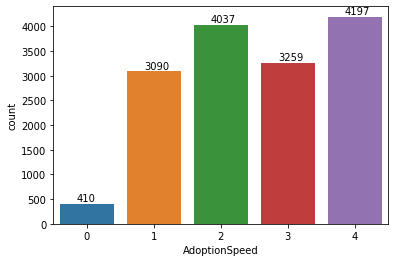

In [27]:
# Count of pets per adoption speed category
adoption_speed_count = sns.countplot(x='AdoptionSpeed',data=raw_dataset)

for p in adoption_speed_count.patches:
        adoption_speed_count.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+50))